# Machine Learning for LAI Estimation
Random Forest and XGBoost are used in this repository.

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import pylab
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from matplotlib import pyplot
from pandas import read_csv
from sklearn.utils import resample
import plotly.express as px

In [2]:
# Call the function for goodness-of-fit
%run D:\Python_Functions\gfit.py

# Random Forest
## Parameters setting for Random Forest

In [3]:
# parameters for the model list here
n_estimators_list = [i for i in np.arange(10,400,50)]
print(n_estimators_list)

n_iterations = 1000
train_percentage = 0.9

[10, 60, 110, 160, 210, 260, 310, 360]


## Read prepared EXCEL file that include the data for machine learning

In [4]:
df = pd.read_excel (r'Demo_LAI_AggieAir.xlsx','Sheet1')
print(df.head())

   mean_DSM_Z  mean_R  mean_G  mean_B  mean_NIR  mean_NDVI  mean_Tr  mean_SR  \
0        1237     697     638     388      3478       8414    30474     2195   
1        1142     716     632     379      3395       8356    30565     2138   
2        1269     817     703     429      3641       8238    30638     1945   
3         988     758     681     426      3540       8329    30611     2128   
4        1108     795     706     436      3656       8275    30587     1894   

   mean_NDWI  mean_GNDVI  ...  COVAR_IronOxide  COVAR_MSAVI  COVAR_MTVI2  \
0       1509        8491  ...             2915         1459            5   
1       1531        8469  ...             3320         1575            6   
2       1591        8409  ...             2216         1463            5   
3       1573        8427  ...             2521         1511            6   
4       1597        8403  ...             1959         1334            5   

   COVAR_NDWI  COVAR_PVI  COVAR_SAVI  COVAR_SR  COVAR_TSAVI  C

In [5]:
feature_cols = ['mean_DSM_Z','mean_R','mean_G','mean_B','mean_NIR','mean_NDVI','mean_Tr','mean_SR','mean_NDWI',
                'mean_GNDVI','mean_SAVI','mean_PVI','mean_EVI','mean_CIg','mean_MTVI2','mean_MSAVI','mean_TSAVI','mean_VARI','mean_IronOxide',
                'std_DSM_Z','std_R','std_G','std_B','std_NIR','std_NDVI','std_Tr','std_SR','std_NDWI',
                'std_GNDVI','std_SAVI','std_PVI','std_EVI','std_CIg','std_MTVI2','std_MSAVI','std_TSAVI','std_VARI','std_IronOxide',
                'min_DSM_Z','min_R','min_G','min_B','min_NIR','min_NDVI','min_Tr','min_SR','min_NDWI',
                'min_GNDVI','min_SAVI','min_PVI','min_EVI','min_CIg','min_MTVI2','min_MSAVI','min_TSAVI','min_VARI','min_IronOxide',
                '25_DSM_Z','25_R','25_G','25_B','25_NIR','25_NDVI','25_Tr','25_SR','25_NDWI',
                '25_GNDVI','25_SAVI','25_PVI','25_EVI','25_CIg','25_MTVI2','25_MSAVI','25_TSAVI','25_VARI','25_IronOxide',
                '50_DSM_Z','50_R','50_G','50_B','50_NIR','50_NDVI','50_Tr','50_SR','50_NDWI',
                '50_GNDVI','50_SAVI','50_PVI','50_EVI','50_CIg','50_MTVI2','50_MSAVI','50_TSAVI','50_VARI','50_IronOxide',
                '75_DSM_Z','75_R','75_G','75_B','75_NIR','75_NDVI','75_Tr','75_SR','75_NDWI',
                '75_GNDVI','75_SAVI','75_PVI','75_EVI','75_CIg','75_MTVI2','75_MSAVI','75_TSAVI','75_VARI','75_IronOxide',
                'max_DSM_Z','max_R','max_G','max_B','max_NIR','max_NDVI','max_Tr','max_SR','max_NDWI',
                'max_GNDVI','max_SAVI','max_PVI','max_EVI','max_CIg','max_MTVI2','max_MSAVI','max_TSAVI','max_VARI','max_IronOxide',
                'cc00','cc01','cc02','cc03','cc04','cc05','cc06','cc07','cc08','cc09','cc10','cc11','cc12','cc13',	
                'cc14','cc15','cc16','cc17','cc18','cc19','cc20','cc21','cc22','cc23','cc24','cc25','cc26','cc27','cc28','cc29','cc30',
                'VDR_DSM','VDR_R','VDR_G','VDR_B','VDR_NIR','VDR_NDVI','VDR_Tr','VDR_CIg','VDR_EVI','VDR_GNDVI',
                'VDR_IronOxide','VDR_MSAVI','VDR_MTVI2','VDR_NDWI','VDR_PVI','VDR_SAVI','VDR_SR','VDR_TSAVI','VDR_VARI',
                'COVAR_DSM','COVAR_R','COVAR_G','COVAR_B','COVAR_NIR','COVAR_NDVI','COVAR_Tr','COVAR_CIg','COVAR_EVI','COVAR_GNDVI',
                'COVAR_IronOxide','COVAR_MSAVI','COVAR_MTVI2','COVAR_NDWI','COVAR_PVI','COVAR_SAVI','COVAR_SR','COVAR_TSAVI','COVAR_VARI']

df_new = df[feature_cols]
X = df[feature_cols]
y = df.Avg_LAI
df_new = pd.concat([X,y], axis=1, ignore_index=True)
df_new = df_new.values
print("Shape of the dataframe is:",df_new.shape)
# print(type(df_new))

Shape of the dataframe is: (500, 203)


## 5 fold cross-validation generating

In [6]:
kf = KFold(n_splits=5, shuffle=False, random_state=None)
kf.get_n_splits(df_new)
# The shape of df
[size_arr,size_col] = df_new.shape
print("Row:",size_arr,"Column:",size_col)

Row: 500 Column: 203


## Create empty list to save all the modeled results for evaluation

In [7]:
[Trees,MAE_train,RMSE_train,RRMSE_train,R_Square_train,NASH_train,
 MAE_test,RMSE_test,RRMSE_test,R_Square_test,NASH_test] = [[],[],[],[],[],
                                                           [],[],[],[],[],[]]

In [8]:
for estimator in n_estimators_list:
    print("\nFor",estimator,"trees in the forest:")
    T_train_pred = []
    T_train_label = []
    T_test_pred = []
    T_test_label = []
    for train_index, test_index in kf.split(df_new):
        regressor_rf = RandomForestRegressor(n_estimators = estimator, random_state = 1)
        tmp_train_x = df_new[train_index,0:size_col-1]
        tmp_train_y = df_new[train_index,size_col-1]
        tmp_test_x = df_new[test_index,0:size_col-1]
        # print(tmp_train_x.shape, tmp_train_y.shape, tmp_test_x.shape)
        regressor_rf = regressor_rf.fit(tmp_train_x, tmp_train_y)
        train_pred = regressor_rf.predict(tmp_train_x)
        test_pred = regressor_rf.predict(tmp_test_x)

        for itouch in range(len(train_pred)):
            T_train_pred.append(train_pred[itouch])
            T_train_label.append(df_new[train_index,size_col-1][itouch])
        for itouch in range(len(test_pred)):
            T_test_pred.append(test_pred[itouch])
            T_test_label.append(df_new[test_index,size_col-1][itouch])
            
            
    # Cross Validation results
    T_train_pred = np.asarray(T_train_pred)
    T_train_label = np.asarray(T_train_label)
    T_test_pred = np.asarray(T_test_pred)
    T_test_label = np.asarray(T_test_label)

    print("Results training:")
    R2_tr = gfit(T_train_label, T_train_pred, '5',residual='No')
    MAE_tr = gfit(T_train_label, T_train_pred, '3',residual='No')
    RMSE_tr = gfit(T_train_label, T_train_pred, '1',residual='No')
    RRMSE_tr = gfit(T_train_label, T_train_pred, '2',residual='No')
    NSE_tr = gfit(T_train_label, T_train_pred, '6',residual='No')
    print(("NSE: {:.4f}".format(NSE_tr)),"MAE: {:.4f}".format(MAE_tr),"RMSE: {:.4f}".format(RMSE_tr),"RRMSE: {:.2f}".format(RRMSE_tr), "%","R2: {:.4f}".format(R2_tr))
  
    print("Results test:")
    R2_te = gfit(T_test_label, T_test_pred, '5',residual='No')
    MAE_te = gfit(T_test_label, T_test_pred, '3',residual='No')
    RMSE_te = gfit(T_test_label, T_test_pred, '1',residual='No')
    RRMSE_te = gfit(T_test_label, T_test_pred, '2',residual='No')
    NSE_te = gfit(T_test_label, T_test_pred, '6',residual='No')
    print(("NSE: {:.4f}".format(NSE_te)),"MAE: {:.4f}".format(MAE_te),"RMSE: {:.4f}".format(RMSE_te),"RRMSE: {:.2f}".format(RRMSE_te), "%","R2: {:.4f}".format(R2_te))

    # Append the results
    Trees.append(estimator)
    R_Square_train.append(R2_tr)
    NASH_train.append(NSE_tr)
    RMSE_train.append(RMSE_tr)
    MAE_train.append(MAE_tr)
    RRMSE_train.append(RRMSE_tr)

    R_Square_test.append(R2_te)
    NASH_test.append(NSE_te)
    RMSE_test.append(RMSE_te)
    MAE_test.append(MAE_te)
    RRMSE_test.append(RRMSE_te)


For 10 trees in the forest:
Results training:
NSE: 0.9865 MAE: 0.0761 RMSE: 0.1365 RRMSE: 10.89 % R2: 0.9872
Results test:
NSE: 0.6341 MAE: 0.4161 RMSE: 0.7094 RRMSE: 56.61 % R2: 0.6465

For 60 trees in the forest:
Results training:
NSE: 0.9903 MAE: 0.0694 RMSE: 0.1152 RRMSE: 9.20 % R2: 0.9908
Results test:
NSE: 0.5812 MAE: 0.4567 RMSE: 0.7589 RRMSE: 60.56 % R2: 0.5850

For 110 trees in the forest:
Results training:
NSE: 0.9905 MAE: 0.0690 RMSE: 0.1144 RRMSE: 9.13 % R2: 0.9909
Results test:
NSE: 0.5943 MAE: 0.4470 RMSE: 0.7471 RRMSE: 59.61 % R2: 0.5968

For 160 trees in the forest:
Results training:
NSE: 0.9909 MAE: 0.0680 RMSE: 0.1121 RRMSE: 8.95 % R2: 0.9913
Results test:
NSE: 0.5885 MAE: 0.4499 RMSE: 0.7524 RRMSE: 60.04 % R2: 0.5913

For 210 trees in the forest:
Results training:
NSE: 0.9909 MAE: 0.0683 RMSE: 0.1121 RRMSE: 8.94 % R2: 0.9913
Results test:
NSE: 0.5790 MAE: 0.4573 RMSE: 0.7609 RRMSE: 60.72 % R2: 0.5827

For 260 trees in the forest:
Results training:
NSE: 0.9909 MAE: 0

## Putting all the results in one table and you can save the table as a CSV file

In [9]:
pd_statistic = pd.DataFrame(
    {'Trees': Trees,
     'R2': R_Square_test,
     'NASH': NASH_test,'MAE': MAE_test,'RMSE': RMSE_test,'RRMSE': RRMSE_test})
print("Statistics to show the performance (examples):")
print(pd_statistic.head(8))
# Optional to save the results
# pd_statistic.to_csv('statistics7.csv')

Statistics to show the performance (examples):
   Trees        R2      NASH       MAE      RMSE      RRMSE
0     10  0.646497  0.634087  0.416111  0.709447  56.611727
1     60  0.585004  0.581243  0.456714  0.758947  60.561713
2    110  0.596846  0.594254  0.447011  0.747064  59.613468
3    160  0.591335  0.588469  0.449922  0.752370  60.036903
4    210  0.582669  0.579033  0.457264  0.760947  60.721304
5    260  0.585282  0.581819  0.457426  0.758426  60.520077
6    310  0.586200  0.582688  0.457066  0.757637  60.457169
7    360  0.585493  0.581725  0.457305  0.758510  60.526842


## Results visualization
This is a "homework" for you: how can we plot the results to make the results more straight forward.<br>
Why we keep this empty for you?
- It's time to show your characteristics: there are many ways to plot the results in python, and the plot can be used for your research presentation.
- Plotting figures in python may require different libraries. Different issues may happen on different computers. This may bother this class. 

In [10]:
# You can plot your figures here


## Rerun the RF model based on the optimal parameter

In [11]:
# get the optimal values from previous processes
estimator = 10

Train dataset: (400, 203) 
Test dataset: (100, 203)
The optimal number of trees in the forest is 10 

Training:


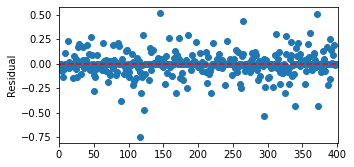

NASH: 0.9885 MAE: 0.0713 RMSE: 0.1236 RRMSE: 9.98 % R2: 0.9888
Test:


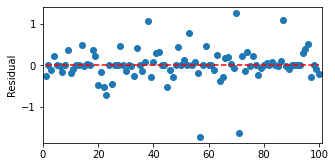

NASH: 0.9025 MAE: 0.2200 RMSE: 0.3880 RRMSE: 29.51 % R2: 0.9033

Trendline is: 
y=1.030287x+(-0.027938)


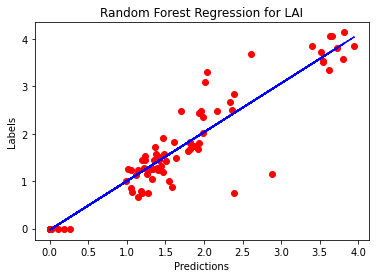

In [12]:
# split the data and
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
train = pd.concat([X_train,y_train], axis=1, ignore_index=True)
test = pd.concat([X_test,y_test], axis=1, ignore_index=True)
print("Train dataset:",train.shape,"\nTest dataset:",test.shape)

# train a new model
regressor_RF = RandomForestRegressor(n_estimators = estimator, random_state = 1)
regressor_RF = regressor_RF.fit(X_train,y_train)
# predict values
train_RF_pred = regressor_RF.predict(X_train)
test_RF_pred = regressor_RF.predict(X_test)

# Four parameters to show the performance of the prediction
print("The optimal number of trees in the forest is",estimator,"\n\nTraining:")
tmp_NASH = gfit(y_train, train_RF_pred, '6', residual='Yes')
tmp_MAE = gfit(y_train, train_RF_pred, '3', residual='No')
tmp_RMSE = gfit(y_train, train_RF_pred, '1', residual='No')
tmp_RRMSE = gfit(y_train, train_RF_pred, '2', residual='No')
tmp_R2 = gfit(y_train, train_RF_pred, '5', residual='No')
print("NASH: {:.4f}".format(tmp_NASH),
      "MAE: {:.4f}".format(tmp_MAE),
      "RMSE: {:.4f}".format(tmp_RMSE),
      "RRMSE: {:.2f}".format(tmp_RRMSE),"%",
      "R2: {:.4f}".format(tmp_R2))
print("Test:")
tmp_NASH = gfit(y_test,test_RF_pred, '6', residual='Yes')
tmp_MAE = gfit(y_test,test_RF_pred, '3', residual='No')
tmp_RMSE = gfit(y_test,test_RF_pred, '1', residual='No')
tmp_RRMSE = gfit(y_test,test_RF_pred, '2', residual='No')
tmp_R2 = gfit(y_test,test_RF_pred, '5', residual='No')
print("NASH: {:.4f}".format(tmp_NASH),
      "MAE: {:.4f}".format(tmp_MAE),
      "RMSE: {:.4f}".format(tmp_RMSE),
      "RRMSE: {:.2f}".format(tmp_RRMSE),"%",
      "R2: {:.4f}".format(tmp_R2))

# Plot the predictions vs. labels: Just present how the results look like
plt.figure
plt.plot(test_RF_pred,y_test,'ro')
plt.title('Random Forest Regression for LAI') 
plt.xlabel('Predictions') 
plt.ylabel('Labels') 
# calc the trendline
z = np.polyfit(test_RF_pred, y_test, 1)
p = np.poly1d(z)
pylab.plot(test_RF_pred,p(test_RF_pred),"b--")
# the line equation:
print('\nTrendline is: ')
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

## Bootstrap
Using bootstrap strategy to show the confidence intervals for those statistics


Bootstraping:
400 records in the train dataset.
Checking information:
The shape of new train dataset for bootstrap in 1 round is (400, 203)
The shape of new train dataset for bootstrap in 2 round is (400, 203)
The shape of new train dataset for bootstrap in 3 round is (400, 203)
The shape of new train dataset for bootstrap in 4 round is (400, 203)
The shape of new train dataset for bootstrap in 5 round is (400, 203)
The shape of new train dataset for bootstrap in 6 round is (400, 203)
The shape of new train dataset for bootstrap in 7 round is (400, 203)
The shape of new train dataset for bootstrap in 8 round is (400, 203)
The shape of new train dataset for bootstrap in 9 round is (400, 203)
The shape of new train dataset for bootstrap in 10 round is (400, 203)
The shape of new train dataset for bootstrap in 11 round is (400, 203)
The shape of new train dataset for bootstrap in 12 round is (400, 203)
The shape of new train dataset for bootstrap in 13 round is (400, 203)
The shape of ne

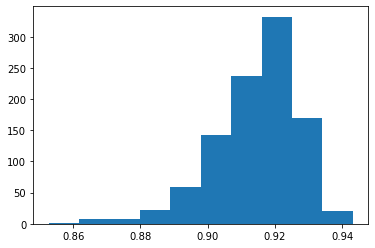

95.0% confidence interval for NSE 0.8850 and 0.9338


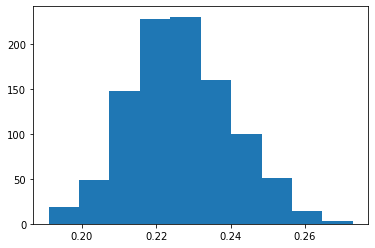

95.0% confidence interval for MAE 0.2004 and 0.2544


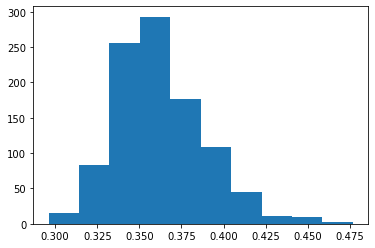

95.0% confidence interval for RMSE 0.3196 and 0.4214


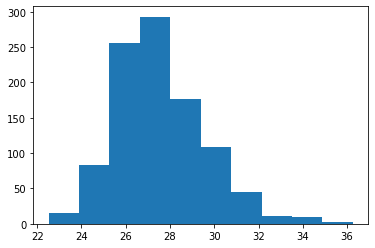

95.0% confidence interval for RRMSE 24.31% and 32.04%


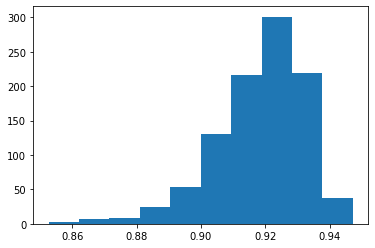

95.0% confidence interval for RRMSE 0.8858 and 0.9392
Based on the bootstrap we can extract the median values for each statistics:
Nash median: 0.9167 
MAE median: 0.2259 
RMSE median: 0.3586 
RRMSE median: 27.27 % 
R2 median: 0.9209
These values will be used as the standard to choose the as less input variables as we need to predict the LAI.


In [13]:
# Bootstraping second
print("\nBootstraping:")
test_bootstrap = test.values

# configure bootstrap
size_train = len(train)
print(size_train,"records in the train dataset.")
# print(len(data),len(X_train))
# n_size = int(len(X_train) * train_percentage)
# train_size = len(X_train)
# print(n_size, train_size)

# run bootstrap
stats_NSE = list()
stats_MAE = list()
stats_RMSE = list()
stats_RRMSE = list()
stats_R2 = list()
print("Checking information:")
for i in range(n_iterations):
    # prepare train dataset
    train_bo_1 = train.sample(frac=train_percentage)
    size_train_bo_1 = len(train_bo_1)
    # print(train_bo_1.shape,size_train_bo_1)
    size_train_bo_2 = size_train - size_train_bo_1
    # print(size_train_bo_2)
    train_bo_2 = train_bo_1.sample(n=size_train_bo_2)
    # print(train_bo_2.shape)
    train_bootstrap = pd.concat([train_bo_1,train_bo_2], axis=0, ignore_index=True)
    train_bootstrap = train_bootstrap.values
    print("The shape of new train dataset for bootstrap in",i+1,"round is",train_bootstrap.shape)
 
    # fit model
    regressor_RF.fit(train_bootstrap[:,:-1], train_bootstrap[:,-1])
    # evaluate model
    predictions = regressor_RF.predict(test_bootstrap[:,:-1])
    score_NSE = gfit(test_bootstrap[:,-1], predictions, '6',residual='No')
    score_MAE = gfit(test_bootstrap[:,-1], predictions, '3',residual='No')
    score_RMSE = gfit(test_bootstrap[:,-1], predictions, '1',residual='No')
    score_RRMSE = gfit(test_bootstrap[:,-1], predictions, '2',residual='No')
    score_R2 = gfit(test_bootstrap[:,-1], predictions, '5',residual='No')

    stats_NSE.append(score_NSE)
    stats_MAE.append(score_MAE)
    stats_RMSE.append(score_RMSE)
    stats_RRMSE.append(score_RRMSE)
    stats_R2.append(score_R2)

# plot NSE
pyplot.hist(stats_NSE)
pyplot.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_NSE = max(0.0, np.percentile(stats_NSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_NSE = min(1.0, np.percentile(stats_NSE, p))
print('%.1f%% confidence interval for NSE %.4f and %.4f' % (alpha*100, lower_NSE, upper_NSE))

# plot MAE
pyplot.hist(stats_MAE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_MAE = max(0.0, np.percentile(stats_MAE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_MAE = min(1.0, np.percentile(stats_MAE, p))
print('%.1f%% confidence interval for MAE %.4f and %.4f' % (alpha*100, lower_MAE, upper_MAE))

# plot RMSE
pyplot.hist(stats_RMSE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_RMSE = max(0.0, np.percentile(stats_RMSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_RMSE = min(1.0, np.percentile(stats_RMSE, p))
print('%.1f%% confidence interval for RMSE %.4f and %.4f' % (alpha*100, lower_RMSE, upper_RMSE))

# plot RRMSE
pyplot.hist(stats_RRMSE)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_RRMSE = max(0.0, np.percentile(stats_RRMSE, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_RRMSE = min(1000, np.percentile(stats_RRMSE, p))
print('%.1f%% confidence interval for RRMSE %.2f%% and %.2f%%' % (alpha*100, lower_RRMSE, upper_RRMSE))

# plot R2
pyplot.hist(stats_R2)
pyplot.show()
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower_R2 = max(0.0, np.percentile(stats_R2, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper_R2 = min(1000, np.percentile(stats_R2, p))
print('%.1f%% confidence interval for RRMSE %.4f and %.4f' % (alpha*100, lower_R2, upper_R2))

# extract the median value for each statistic as the standard to choose the optimal number of input prediction variables (last part)
print("Based on the bootstrap we can extract the median values for each statistics:")
standard_NSE = np.median(stats_NSE)
standard_MAE = np.median(stats_MAE)
standard_RMSE = np.median(stats_RMSE)
standard_RRMSE = np.median(stats_RRMSE)
standard_R2 = np.median(stats_R2)
print("Nash median: {:.4}".format(standard_NSE),
      "\nMAE median: {:.4}".format(standard_MAE),
      "\nRMSE median: {:.4}".format(standard_RMSE),
      "\nRRMSE median: {:.4}".format(standard_RRMSE),"%",
      "\nR2 median: {:.4}".format(standard_R2))
print("These values will be used as the standard to choose the as less input variables as we need to predict the LAI.")